In [371]:
import numpy as np
import glob
import csv as csv
import pandas as pd
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
import os 
import re

In [543]:
#load in the CSV file of all of the bird labels and filepaths
bird_dat = pd.read_csv('data/birds.csv') 
paths = pd.Series(bird_dat['filepaths']) #save the paths to a pandas series
labels = pd.Series(bird_dat['labels']) #save the labels to a pandas series

In [421]:
# import required modules
from bs4 import BeautifulSoup
import requests
 
# get URL
page = requests.get("https://en.wikipedia.org/wiki/List_of_birds_of_the_United_States")
page = requests.get("https://en.wikipedia.org/wiki/List_of_birds_of_North_America")
page = requests.get("https://en.wikipedia.org/wiki/List_of_birds_of_Ohio")
page = requests.get("https://en.wikipedia.org/wiki/List_of_birds_of_New_York_(state)")
# scrape webpage
soup = BeautifulSoup(page.content, 'html.parser')
 
list(soup.children)
 
# find all occurrence of p in HTML
# includes HTML tags
print(soup.find_all('a'))
 
print('\n\n')
 
# return only text
# does not include HTML tags
print(soup.find_all('p')[0].get_text())

[<a id="top"></a>, <a class="mw-jump-link" href="#mw-head">Jump to navigation</a>, <a class="mw-jump-link" href="#searchInput">Jump to search</a>, <a class="image" href="/wiki/File:Eastern_Bluebirds.jpg"><img alt="" class="thumbimage" data-file-height="900" data-file-width="720" decoding="async" height="275" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/04/Eastern_Bluebirds.jpg/220px-Eastern_Bluebirds.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/04/Eastern_Bluebirds.jpg/330px-Eastern_Bluebirds.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/04/Eastern_Bluebirds.jpg/440px-Eastern_Bluebirds.jpg 2x" width="220"/></a>, <a class="internal" href="/wiki/File:Eastern_Bluebirds.jpg" title="Enlarge"></a>, <a href="/wiki/Eastern_bluebird" title="Eastern bluebird">eastern bluebird</a>, <a href="/wiki/List_of_U.S._state_birds" title="List of U.S. state birds">state bird</a>, <a href="/wiki/Species" title="Species">species</a>, <a href="/wiki/Bird" title="Bird">bi

In [386]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of birds of the United States - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"e678b0d5-a5cb-46b4-9d31-f5aadb464b85","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_birds_of_the_United_States","wgTitle":"List of birds of the United States","wgCurRevisionId":1087960179,"wgRevisionId":1087960179,"wgArticleId":14941202,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from W

In [422]:
#find all instances of birds names
bird_wiki = soup.find_all('li')

In [423]:
bird_list = str(bird_wiki)
#find all the instances of titles, this is where the namesare
result_beg = np.asarray([_.start() for _ in re.finditer('title="',bird_list)],dtype=int)
bird_names = []
#loop through and save the titles to an array
for i in range(len(result_beg)):
    bird_names.append(bird_list[result_beg[i] +7:bird_list.find('">',result_beg[i])])
bird_names = pd.Series(bird_names,dtype='str')
bird_names = bird_names.str.upper()

In [442]:
#match the titles to the Kaggle dataset
labels_i = np.unique(labels)
matches = []
for i in range(len(labels_i)):
    matched_lines = bird_names[bird_names.str.contains(labels_i[i])==1]
    if(len(matched_lines)>0):
        matches.append(labels_i[i])
    else:
        matched_lines = bird_names[bird_names.str.replace('-',' ').str.contains(labels_i[i])==1]
        if(len(matched_lines)>0):
            matches.append(labels_i[i])
#these two have typos, make sure to include them            
matches.append('KILLDEAR')
matches.append('BROWN CREPPER')

In [443]:
#there are 100 matches
len(matches)

100

In [452]:
#make the new directories
for i in range(len(matches)):
    old_path_train = str('data/train/' + matches[i])
    new_path_train = str('dataNY/train/' + matches[i])

    old_path_valid = str('data/valid/' + matches[i])
    new_path_valid = str('dataNY/valid/' + matches[i])

    old_path_test = str('data/test/' + matches[i])
    new_path_test = str('dataNY/test/' + matches[i])

    os.system("cp -r '" + old_path_train + "' '" + new_path_train + "'")
    os.system("cp -r '" + old_path_valid + "' '" + new_path_valid + "'")
    os.system("cp -r '" + old_path_test + "' '" + new_path_test + "'")

In [453]:
#zip the new directory together
os.system("zip -r NYbirds.zip dataNY") 

  adding: dataNY/ (stored 0%)
  adding: dataNY/test/ (stored 0%)
  adding: dataNY/test/PURPLE GALLINULE/ (stored 0%)
  adding: dataNY/test/PURPLE GALLINULE/4.jpg (deflated 1%)
  adding: dataNY/test/PURPLE GALLINULE/5.jpg (deflated 1%)
  adding: dataNY/test/PURPLE GALLINULE/2.jpg (deflated 1%)
  adding: dataNY/test/PURPLE GALLINULE/1.jpg (deflated 1%)
  adding: dataNY/test/PURPLE GALLINULE/3.jpg (deflated 1%)
  adding: dataNY/test/BALD EAGLE/ (stored 0%)
  adding: dataNY/test/BALD EAGLE/4.jpg (deflated 1%)
  adding: dataNY/test/BALD EAGLE/5.jpg (deflated 1%)
  adding: dataNY/test/BALD EAGLE/2.jpg (deflated 1%)
  adding: dataNY/test/BALD EAGLE/1.jpg (deflated 1%)
  adding: dataNY/test/BALD EAGLE/3.jpg (deflated 1%)
  adding: dataNY/test/CHIPPING SPARROW/ (stored 0%)
  adding: dataNY/test/CHIPPING SPARROW/4.jpg (deflated 1%)
  adding: dataNY/test/CHIPPING SPARROW/5.jpg (deflated 1%)
  adding: dataNY/test/CHIPPING SPARROW/2.jpg (deflated 1%)
  adding: dataNY/test/CHIPPING SPARROW/1.jpg (de

  adding: dataNY/test/DARK EYED JUNCO/3.jpg (deflated 1%)
  adding: dataNY/test/DOWNY WOODPECKER/ (stored 0%)
  adding: dataNY/test/DOWNY WOODPECKER/4.jpg (deflated 1%)
  adding: dataNY/test/DOWNY WOODPECKER/5.jpg (deflated 1%)
  adding: dataNY/test/DOWNY WOODPECKER/2.jpg (deflated 1%)
  adding: dataNY/test/DOWNY WOODPECKER/1.jpg (deflated 1%)
  adding: dataNY/test/DOWNY WOODPECKER/3.jpg (deflated 1%)
  adding: dataNY/valid/ (stored 0%)
  adding: dataNY/valid/PURPLE GALLINULE/ (stored 0%)
  adding: dataNY/valid/PURPLE GALLINULE/4.jpg (deflated 1%)
  adding: dataNY/valid/PURPLE GALLINULE/5.jpg (deflated 1%)
  adding: dataNY/valid/PURPLE GALLINULE/2.jpg (deflated 1%)
  adding: dataNY/valid/PURPLE GALLINULE/1.jpg (deflated 1%)
  adding: dataNY/valid/PURPLE GALLINULE/3.jpg (deflated 1%)
  adding: dataNY/valid/BALD EAGLE/ (stored 0%)
  adding: dataNY/valid/BALD EAGLE/4.jpg (deflated 1%)
  adding: dataNY/valid/BALD EAGLE/5.jpg (deflated 1%)
  adding: dataNY/valid/BALD EAGLE/2.jpg (deflated 1

  adding: dataNY/valid/TURKEY VULTURE/1.jpg (deflated 1%)
  adding: dataNY/valid/TURKEY VULTURE/3.jpg (deflated 1%)
  adding: dataNY/valid/BAY-BREASTED WARBLER/ (stored 0%)
  adding: dataNY/valid/BAY-BREASTED WARBLER/4.jpg (deflated 1%)
  adding: dataNY/valid/BAY-BREASTED WARBLER/5.jpg (deflated 1%)
  adding: dataNY/valid/BAY-BREASTED WARBLER/2.jpg (deflated 1%)
  adding: dataNY/valid/BAY-BREASTED WARBLER/1.jpg (deflated 1%)
  adding: dataNY/valid/BAY-BREASTED WARBLER/3.jpg (deflated 1%)
  adding: dataNY/valid/DARK EYED JUNCO/ (stored 0%)
  adding: dataNY/valid/DARK EYED JUNCO/4.jpg (deflated 1%)
  adding: dataNY/valid/DARK EYED JUNCO/5.jpg (deflated 1%)
  adding: dataNY/valid/DARK EYED JUNCO/2.jpg (deflated 1%)
  adding: dataNY/valid/DARK EYED JUNCO/1.jpg (deflated 1%)
  adding: dataNY/valid/DARK EYED JUNCO/3.jpg (deflated 1%)
  adding: dataNY/valid/DOWNY WOODPECKER/ (stored 0%)
  adding: dataNY/valid/DOWNY WOODPECKER/4.jpg (deflated 1%)
  adding: dataNY/valid/DOWNY WOODPECKER/5.jpg (

  adding: dataNY/train/POMARINE JAEGER/136.jpg (deflated 1%)
  adding: dataNY/train/POMARINE JAEGER/041.jpg (deflated 1%)
  adding: dataNY/train/POMARINE JAEGER/119.jpg (deflated 1%)
  adding: dataNY/train/POMARINE JAEGER/139.jpg (deflated 1%)
  adding: dataNY/train/POMARINE JAEGER/030.jpg (deflated 1%)
  adding: dataNY/train/POMARINE JAEGER/110.jpg (deflated 1%)
  adding: dataNY/train/POMARINE JAEGER/051.jpg (deflated 1%)
  adding: dataNY/train/POMARINE JAEGER/107.jpg (deflated 1%)
  adding: dataNY/train/POMARINE JAEGER/014.jpg (deflated 1%)
  adding: dataNY/train/POMARINE JAEGER/023.jpg (deflated 1%)
  adding: dataNY/train/POMARINE JAEGER/080.jpg (deflated 1%)
  adding: dataNY/train/POMARINE JAEGER/005.jpg (deflated 2%)
  adding: dataNY/train/POMARINE JAEGER/072.jpg (deflated 1%)
  adding: dataNY/train/POMARINE JAEGER/122.jpg (deflated 1%)
  adding: dataNY/train/POMARINE JAEGER/010.jpg (deflated 1%)
  adding: dataNY/train/POMARINE JAEGER/007.jpg (deflated 1%)
  adding: dataNY/train/P

  adding: dataNY/train/RED HEADED WOODPECKER/066.jpg (deflated 1%)
  adding: dataNY/train/RED HEADED WOODPECKER/040.jpg (deflated 1%)
  adding: dataNY/train/RED HEADED WOODPECKER/117.jpg (deflated 1%)
  adding: dataNY/train/RED HEADED WOODPECKER/109.jpg (deflated 1%)
  adding: dataNY/train/RED HEADED WOODPECKER/008.jpg (deflated 1%)
  adding: dataNY/train/RED HEADED WOODPECKER/062.jpg (deflated 1%)
  adding: dataNY/train/RED HEADED WOODPECKER/073.jpg (deflated 1%)
  adding: dataNY/train/RED HEADED WOODPECKER/039.jpg (deflated 1%)
  adding: dataNY/train/RED HEADED WOODPECKER/016.jpg (deflated 1%)
  adding: dataNY/train/RED HEADED WOODPECKER/075.jpg (deflated 1%)
  adding: dataNY/train/RED HEADED WOODPECKER/054.jpg (deflated 1%)
  adding: dataNY/train/RED HEADED WOODPECKER/090.jpg (deflated 1%)
  adding: dataNY/train/RED HEADED WOODPECKER/025.jpg (deflated 1%)
  adding: dataNY/train/RED HEADED WOODPECKER/057.jpg (deflated 1%)
  adding: dataNY/train/RED HEADED WOODPECKER/085.jpg (deflated

  adding: dataNY/train/BOBOLINK/071.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/141.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/129.jpg (deflated 2%)
  adding: dataNY/train/BOBOLINK/101.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/048.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/061.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/092.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/111.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/036.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/004.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/114.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/033.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/003.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/118.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/112.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/053.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/065.jpg (deflated 1%)
  adding: dataNY/train/BOBOLINK/027.jpg (deflated 1%)
  adding: dataNY/train/BOBOL

  adding: dataNY/train/RUBY THROATED HUMMINGBIRD/070.jpg (deflated 1%)
  adding: dataNY/train/RUBY THROATED HUMMINGBIRD/015.jpg (deflated 1%)
  adding: dataNY/train/RUBY THROATED HUMMINGBIRD/100.jpg (deflated 1%)
  adding: dataNY/train/RUBY THROATED HUMMINGBIRD/137.jpg (deflated 1%)
  adding: dataNY/train/RUBY THROATED HUMMINGBIRD/071.jpg (deflated 1%)
  adding: dataNY/train/RUBY THROATED HUMMINGBIRD/129.jpg (deflated 1%)
  adding: dataNY/train/RUBY THROATED HUMMINGBIRD/101.jpg (deflated 1%)
  adding: dataNY/train/RUBY THROATED HUMMINGBIRD/048.jpg (deflated 1%)
  adding: dataNY/train/RUBY THROATED HUMMINGBIRD/061.jpg (deflated 1%)
  adding: dataNY/train/RUBY THROATED HUMMINGBIRD/106.jpg (deflated 1%)
  adding: dataNY/train/RUBY THROATED HUMMINGBIRD/092.jpg (deflated 1%)
  adding: dataNY/train/RUBY THROATED HUMMINGBIRD/111.jpg (deflated 1%)
  adding: dataNY/train/RUBY THROATED HUMMINGBIRD/036.jpg (deflated 1%)
  adding: dataNY/train/RUBY THROATED HUMMINGBIRD/004.jpg (deflated 1%)
  addi

  adding: dataNY/train/YELLOW HEADED BLACKBIRD/136.jpg (deflated 1%)
  adding: dataNY/train/YELLOW HEADED BLACKBIRD/041.jpg (deflated 1%)
  adding: dataNY/train/YELLOW HEADED BLACKBIRD/119.jpg (deflated 1%)
  adding: dataNY/train/YELLOW HEADED BLACKBIRD/139.jpg (deflated 1%)
  adding: dataNY/train/YELLOW HEADED BLACKBIRD/030.jpg (deflated 1%)
  adding: dataNY/train/YELLOW HEADED BLACKBIRD/110.jpg (deflated 4%)
  adding: dataNY/train/YELLOW HEADED BLACKBIRD/051.jpg (deflated 1%)
  adding: dataNY/train/YELLOW HEADED BLACKBIRD/107.jpg (deflated 1%)
  adding: dataNY/train/YELLOW HEADED BLACKBIRD/014.jpg (deflated 1%)
  adding: dataNY/train/YELLOW HEADED BLACKBIRD/023.jpg (deflated 1%)
  adding: dataNY/train/YELLOW HEADED BLACKBIRD/080.jpg (deflated 1%)
  adding: dataNY/train/YELLOW HEADED BLACKBIRD/142.jpg (deflated 1%)
  adding: dataNY/train/YELLOW HEADED BLACKBIRD/156.jpg (deflated 1%)
  adding: dataNY/train/YELLOW HEADED BLACKBIRD/005.jpg (deflated 1%)
  adding: dataNY/train/YELLOW HEAD

  adding: dataNY/train/GREAT GRAY OWL/047.jpg (deflated 1%)
  adding: dataNY/train/GREAT GRAY OWL/144.jpg (deflated 1%)
  adding: dataNY/train/GREAT GRAY OWL/052.jpg (deflated 1%)
  adding: dataNY/train/COMMON LOON/ (stored 0%)
  adding: dataNY/train/COMMON LOON/022.jpg (deflated 1%)
  adding: dataNY/train/COMMON LOON/026.jpg (deflated 1%)
  adding: dataNY/train/COMMON LOON/049.jpg (deflated 1%)
  adding: dataNY/train/COMMON LOON/102.jpg (deflated 1%)
  adding: dataNY/train/COMMON LOON/045.jpg (deflated 1%)
  adding: dataNY/train/COMMON LOON/013.jpg (deflated 1%)
  adding: dataNY/train/COMMON LOON/103.jpg (deflated 1%)
  adding: dataNY/train/COMMON LOON/060.jpg (deflated 1%)
  adding: dataNY/train/COMMON LOON/105.jpg (deflated 1%)
  adding: dataNY/train/COMMON LOON/001.jpg (deflated 1%)
  adding: dataNY/train/COMMON LOON/063.jpg (deflated 1%)
  adding: dataNY/train/COMMON LOON/037.jpg (deflated 1%)
  adding: dataNY/train/COMMON LOON/024.jpg (deflated 1%)
  adding: dataNY/train/COMMON L

  adding: dataNY/train/AMERICAN PIPIT/160.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/125.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/120.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/113.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/173.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/088.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/035.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/161.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/089.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/020.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/059.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/172.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/096.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/148.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/079.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/055.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN PIPIT/04

  adding: dataNY/train/CAPE MAY WARBLER/128.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/132.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/038.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/116.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/094.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/068.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/029.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/095.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/098.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/011.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/115.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/082.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/069.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/050.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/064.jpg (deflated 1%)
  adding: dataNY/train/CAPE MAY WARBLER/032.jpg (deflated 1%)
  adding

  adding: dataNY/train/SHORT BILLED DOWITCHER/016.jpg (deflated 1%)
  adding: dataNY/train/SHORT BILLED DOWITCHER/075.jpg (deflated 1%)
  adding: dataNY/train/SHORT BILLED DOWITCHER/054.jpg (deflated 1%)
  adding: dataNY/train/SHORT BILLED DOWITCHER/163.jpg (deflated 1%)
  adding: dataNY/train/SHORT BILLED DOWITCHER/090.jpg (deflated 1%)
  adding: dataNY/train/SHORT BILLED DOWITCHER/025.jpg (deflated 1%)
  adding: dataNY/train/SHORT BILLED DOWITCHER/057.jpg (deflated 1%)
  adding: dataNY/train/SHORT BILLED DOWITCHER/085.jpg (deflated 1%)
  adding: dataNY/train/SHORT BILLED DOWITCHER/124.jpg (deflated 1%)
  adding: dataNY/train/SHORT BILLED DOWITCHER/076.jpg (deflated 1%)
  adding: dataNY/train/SHORT BILLED DOWITCHER/046.jpg (deflated 1%)
  adding: dataNY/train/SHORT BILLED DOWITCHER/074.jpg (deflated 1%)
  adding: dataNY/train/SHORT BILLED DOWITCHER/091.jpg (deflated 1%)
  adding: dataNY/train/SHORT BILLED DOWITCHER/044.jpg (deflated 1%)
  adding: dataNY/train/SHORT BILLED DOWITCHER/13

  adding: dataNY/train/HOODED MERGANSER/024.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/108.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/127.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/058.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/067.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/081.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/133.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/042.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/099.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/021.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/097.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/009.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/066.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/040.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/117.jpg (deflated 1%)
  adding: dataNY/train/HOODED MERGANSER/109.jpg (deflated 1%)
  adding

  adding: dataNY/train/HORNED LARK/073.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/149.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/039.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/016.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/075.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/054.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/163.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/090.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/025.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/057.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/085.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/124.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/076.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/046.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/074.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/091.jpg (deflated 1%)
  adding: dataNY/train/HORNED LARK/044.jpg (deflated 1%)
  adding: dataNY/train/HORNED L

  adding: dataNY/train/PAINTED BUNTING/094.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/068.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/029.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/095.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/098.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/011.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/155.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/158.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/115.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/159.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/082.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/069.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/050.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/064.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/032.jpg (deflated 1%)
  adding: dataNY/train/PAINTED BUNTING/017.jpg (deflated 1%)
  adding: dataNY/train/P

  adding: dataNY/train/HOUSE FINCH/111.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/036.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/004.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/114.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/033.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/003.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/118.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/203.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/112.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/178.jpg (deflated 3%)
  adding: dataNY/train/HOUSE FINCH/162.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/170.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/053.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/237.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/232.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/065.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FINCH/027.jpg (deflated 1%)
  adding: dataNY/train/HOUSE FI

  adding: dataNY/train/SORA/021.jpg (deflated 1%)
  adding: dataNY/train/SORA/097.jpg (deflated 1%)
  adding: dataNY/train/SORA/009.jpg (deflated 1%)
  adding: dataNY/train/SORA/177.jpg (deflated 1%)
  adding: dataNY/train/SORA/193.jpg (deflated 1%)
  adding: dataNY/train/SORA/066.jpg (deflated 1%)
  adding: dataNY/train/SORA/040.jpg (deflated 1%)
  adding: dataNY/train/SORA/117.jpg (deflated 1%)
  adding: dataNY/train/SORA/188.jpg (deflated 1%)
  adding: dataNY/train/SORA/109.jpg (deflated 1%)
  adding: dataNY/train/SORA/200.jpg (deflated 1%)
  adding: dataNY/train/SORA/008.jpg (deflated 1%)
  adding: dataNY/train/SORA/062.jpg (deflated 1%)
  adding: dataNY/train/SORA/135.jpg (deflated 1%)
  adding: dataNY/train/SORA/073.jpg (deflated 1%)
  adding: dataNY/train/SORA/149.jpg (deflated 1%)
  adding: dataNY/train/SORA/039.jpg (deflated 1%)
  adding: dataNY/train/SORA/016.jpg (deflated 1%)
  adding: dataNY/train/SORA/075.jpg (deflated 1%)
  adding: dataNY/train/SORA/054.jpg (deflated 1%)


  adding: dataNY/train/OVENBIRD/214.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/148.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/202.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/079.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/055.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/043.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/104.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/087.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/121.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/028.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/138.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/131.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/093.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/056.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/229.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/150.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/174.jpg (deflated 1%)
  adding: dataNY/train/OVENBIRD/157.jpg (deflated 1%)
  adding: dataNY/train/OVENB

  adding: dataNY/train/IVORY GULL/126.jpg (deflated 1%)
  adding: dataNY/train/IVORY GULL/031.jpg (deflated 1%)
  adding: dataNY/train/IVORY GULL/151.jpg (deflated 1%)
  adding: dataNY/train/IVORY GULL/012.jpg (deflated 1%)
  adding: dataNY/train/IVORY GULL/153.jpg (deflated 1%)
  adding: dataNY/train/IVORY GULL/047.jpg (deflated 1%)
  adding: dataNY/train/IVORY GULL/144.jpg (deflated 1%)
  adding: dataNY/train/IVORY GULL/154.jpg (deflated 1%)
  adding: dataNY/train/IVORY GULL/052.jpg (deflated 2%)
  adding: dataNY/train/EASTERN BLUEBIRD/ (stored 0%)
  adding: dataNY/train/EASTERN BLUEBIRD/022.jpg (deflated 1%)
  adding: dataNY/train/EASTERN BLUEBIRD/026.jpg (deflated 1%)
  adding: dataNY/train/EASTERN BLUEBIRD/049.jpg (deflated 1%)
  adding: dataNY/train/EASTERN BLUEBIRD/102.jpg (deflated 1%)
  adding: dataNY/train/EASTERN BLUEBIRD/045.jpg (deflated 1%)
  adding: dataNY/train/EASTERN BLUEBIRD/013.jpg (deflated 1%)
  adding: dataNY/train/EASTERN BLUEBIRD/103.jpg (deflated 1%)
  adding:

  adding: dataNY/train/BROWN THRASHER/162.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/23.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/16.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/160.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/125.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/120.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/113.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/74.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/161.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/47.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/54.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/43.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/148.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/104.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/121.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/14.jpg (deflated 1%)
  adding: dataNY/train/BROWN THRASHER/83.jpg (d

  adding: dataNY/train/SNOWY OWL/034.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/006.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/086.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/134.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/128.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/132.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/038.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/116.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/094.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/068.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/029.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/095.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/098.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/011.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/155.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/158.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/115.jpg (deflated 1%)
  adding: dataNY/train/SNOWY OWL/159.jpg (deflated 1%)
  adding: 

  adding: dataNY/train/FRIGATE/010.jpg (deflated 2%)
  adding: dataNY/train/FRIGATE/007.jpg (deflated 1%)
  adding: dataNY/train/FRIGATE/019.jpg (deflated 2%)
  adding: dataNY/train/FRIGATE/070.jpg (deflated 1%)
  adding: dataNY/train/FRIGATE/015.jpg (deflated 1%)
  adding: dataNY/train/FRIGATE/100.jpg (deflated 1%)
  adding: dataNY/train/FRIGATE/071.jpg (deflated 2%)
  adding: dataNY/train/FRIGATE/101.jpg (deflated 2%)
  adding: dataNY/train/FRIGATE/048.jpg (deflated 1%)
  adding: dataNY/train/FRIGATE/061.jpg (deflated 2%)
  adding: dataNY/train/FRIGATE/106.jpg (deflated 5%)
  adding: dataNY/train/FRIGATE/092.jpg (deflated 1%)
  adding: dataNY/train/FRIGATE/111.jpg (deflated 1%)
  adding: dataNY/train/FRIGATE/036.jpg (deflated 1%)
  adding: dataNY/train/FRIGATE/004.jpg (deflated 1%)
  adding: dataNY/train/FRIGATE/114.jpg (deflated 1%)
  adding: dataNY/train/FRIGATE/033.jpg (deflated 1%)
  adding: dataNY/train/FRIGATE/003.jpg (deflated 1%)
  adding: dataNY/train/FRIGATE/118.jpg (deflat

  adding: dataNY/train/NORTHERN CARDINAL/125.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN CARDINAL/120.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN CARDINAL/113.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN CARDINAL/088.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN CARDINAL/035.jpg (deflated 2%)
  adding: dataNY/train/NORTHERN CARDINAL/089.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN CARDINAL/020.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN CARDINAL/059.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN CARDINAL/096.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN CARDINAL/079.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN CARDINAL/055.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN CARDINAL/043.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN CARDINAL/104.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN CARDINAL/087.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN CARDINAL/121.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN CARDINAL/028.jpg (defla

  adding: dataNY/train/GRAY PARTRIDGE/057.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/085.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/076.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/046.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/074.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/091.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/044.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/002.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/078.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/077.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/084.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/018.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/041.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/119.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/030.jpg (deflated 1%)
  adding: dataNY/train/GRAY PARTRIDGE/110.jpg (deflated 2%)
  adding: dataNY/train/GRAY PARTRIDGE/05

  adding: dataNY/train/NORTHERN FLICKER/105.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/001.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/063.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/037.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/024.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/108.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/127.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/058.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/067.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/081.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/133.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/042.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/099.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/021.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/097.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN FLICKER/009.jpg (deflated 1%)
  adding

  adding: dataNY/train/SPOONBILL/069.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/050.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/187.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/064.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/032.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/017.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/126.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/031.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/151.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/012.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/153.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/047.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/144.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/154.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/052.jpg (deflated 1%)
  adding: dataNY/train/SPOONBILL/189.jpg (deflated 1%)
  adding: dataNY/train/SNOWY EGRET/ (stored 0%)
  adding: dataNY/train/SNOWY EGRET/102.jpg (deflated 1%)
  adding: dataN

  adding: dataNY/train/NORTHERN MOCKINGBIRD/009.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN MOCKINGBIRD/066.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN MOCKINGBIRD/040.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN MOCKINGBIRD/117.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN MOCKINGBIRD/109.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN MOCKINGBIRD/008.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN MOCKINGBIRD/062.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN MOCKINGBIRD/135.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN MOCKINGBIRD/073.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN MOCKINGBIRD/039.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN MOCKINGBIRD/016.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN MOCKINGBIRD/075.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN MOCKINGBIRD/054.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN MOCKINGBIRD/090.jpg (deflated 1%)
  adding: dataNY/train/NORTHERN MOCKINGBIRD/025.jpg (deflated 1%)
  adding: 

  adding: dataNY/train/GLOSSY IBIS/127.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/058.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/067.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/081.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/152.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/133.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/042.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/099.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/021.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/097.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/009.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/066.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/040.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/117.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/109.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/008.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY IBIS/062.jpg (deflated 1%)
  adding: dataNY/train/GLOSSY I

  adding: dataNY/train/RING-NECKED PHEASANT/128.jpg (deflated 1%)
  adding: dataNY/train/RING-NECKED PHEASANT/132.jpg (deflated 1%)
  adding: dataNY/train/RING-NECKED PHEASANT/73.jpg (deflated 1%)
  adding: dataNY/train/RING-NECKED PHEASANT/31.jpg (deflated 1%)
  adding: dataNY/train/RING-NECKED PHEASANT/57.jpg (deflated 1%)
  adding: dataNY/train/RING-NECKED PHEASANT/116.jpg (deflated 1%)
  adding: dataNY/train/RING-NECKED PHEASANT/90.jpg (deflated 1%)
  adding: dataNY/train/RING-NECKED PHEASANT/08.jpg (deflated 1%)
  adding: dataNY/train/RING-NECKED PHEASANT/50.jpg (deflated 1%)
  adding: dataNY/train/RING-NECKED PHEASANT/20.jpg (deflated 1%)
  adding: dataNY/train/RING-NECKED PHEASANT/115.jpg (deflated 1%)
  adding: dataNY/train/RING-NECKED PHEASANT/37.jpg (deflated 1%)
  adding: dataNY/train/RING-NECKED PHEASANT/95.jpg (deflated 1%)
  adding: dataNY/train/RING-NECKED PHEASANT/11.jpg (deflated 1%)
  adding: dataNY/train/RING-NECKED PHEASANT/17.jpg (deflated 1%)
  adding: dataNY/trai

  adding: dataNY/train/AMERICAN BITTERN/088.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/035.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/161.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/089.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/020.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/059.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/096.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/148.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/079.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/055.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/043.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/104.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/087.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/121.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/028.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN BITTERN/138.jpg (deflated 1%)
  adding

  adding: dataNY/train/TREE SWALLOW/070.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/015.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/100.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/137.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/071.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/141.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/129.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/101.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/048.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/061.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/106.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/092.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/111.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/036.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/004.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/114.jpg (deflated 1%)
  adding: dataNY/train/TREE SWALLOW/033.jpg (deflated 1%)
  adding: data

  adding: dataNY/train/ROBIN/56.jpg (deflated 1%)
  adding: dataNY/train/ROBIN/49.jpg (deflated 1%)
  adding: dataNY/train/ROBIN/96.jpg (deflated 1%)
  adding: dataNY/train/ROBIN/85.jpg (deflated 1%)
  adding: dataNY/train/ROBIN/75.jpg (deflated 1%)
  adding: dataNY/train/ROBIN/144.jpg (deflated 1%)
  adding: dataNY/train/ROBIN/22.jpg (deflated 1%)
  adding: dataNY/train/ROBIN/21.jpg (deflated 1%)
  adding: dataNY/train/ROBIN/62.jpg (deflated 1%)
  adding: dataNY/train/CALIFORNIA GULL/ (stored 0%)
  adding: dataNY/train/CALIFORNIA GULL/022.jpg (deflated 1%)
  adding: dataNY/train/CALIFORNIA GULL/026.jpg (deflated 1%)
  adding: dataNY/train/CALIFORNIA GULL/049.jpg (deflated 1%)
  adding: dataNY/train/CALIFORNIA GULL/102.jpg (deflated 1%)
  adding: dataNY/train/CALIFORNIA GULL/045.jpg (deflated 1%)
  adding: dataNY/train/CALIFORNIA GULL/013.jpg (deflated 1%)
  adding: dataNY/train/CALIFORNIA GULL/103.jpg (deflated 1%)
  adding: dataNY/train/CALIFORNIA GULL/060.jpg (deflated 1%)
  adding:

  adding: dataNY/train/AMERICAN AVOCET/019.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/070.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/015.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/100.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/137.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/071.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/141.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/129.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/101.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/048.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/061.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/106.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/092.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/111.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/036.jpg (deflated 1%)
  adding: dataNY/train/AMERICAN AVOCET/004.jpg (deflated 1%)
  adding: dataNY/train/A

  adding: dataNY/train/BAY-BREASTED WARBLER/099.jpg (deflated 1%)
  adding: dataNY/train/BAY-BREASTED WARBLER/021.jpg (deflated 1%)
  adding: dataNY/train/BAY-BREASTED WARBLER/097.jpg (deflated 1%)
  adding: dataNY/train/BAY-BREASTED WARBLER/009.jpg (deflated 1%)
  adding: dataNY/train/BAY-BREASTED WARBLER/066.jpg (deflated 1%)
  adding: dataNY/train/BAY-BREASTED WARBLER/040.jpg (deflated 1%)
  adding: dataNY/train/BAY-BREASTED WARBLER/117.jpg (deflated 1%)
  adding: dataNY/train/BAY-BREASTED WARBLER/109.jpg (deflated 1%)
  adding: dataNY/train/BAY-BREASTED WARBLER/008.jpg (deflated 1%)
  adding: dataNY/train/BAY-BREASTED WARBLER/062.jpg (deflated 1%)
  adding: dataNY/train/BAY-BREASTED WARBLER/135.jpg (deflated 1%)
  adding: dataNY/train/BAY-BREASTED WARBLER/073.jpg (deflated 1%)
  adding: dataNY/train/BAY-BREASTED WARBLER/039.jpg (deflated 1%)
  adding: dataNY/train/BAY-BREASTED WARBLER/016.jpg (deflated 1%)
  adding: dataNY/train/BAY-BREASTED WARBLER/075.jpg (deflated 1%)
  adding: 

0

In [479]:
#write a new csv file with only NY birds
NA_lines = []
labels = pd.Series(bird_dat['labels'])
for i in range(len(matches)):
    #NA_lines.extend(np.where(labels.str.contains(matches[i]).values)[0])
    NA_lines.extend(np.where(labels==matches[i])[0])
NA_tab = bird_dat.iloc[NA_lines]
NA_tab.to_csv('NYbirds.csv',index=False)

In [464]:
#do some EDS
data_dir = 'dataNY/train/'
batch_size = 32
img_height = 224
img_width = 224

#make a batch instance of the images
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.0,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=True)
class_names = train_ds.class_names

Found 14940 files belonging to 100 classes.


/tmp/ipykernel_70883/1781871341.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(3, 3, i + 1)


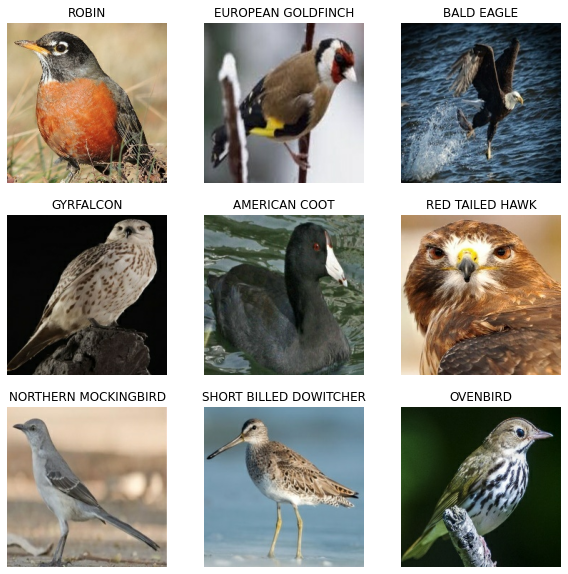

In [467]:
#plot 9 of the images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(7):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


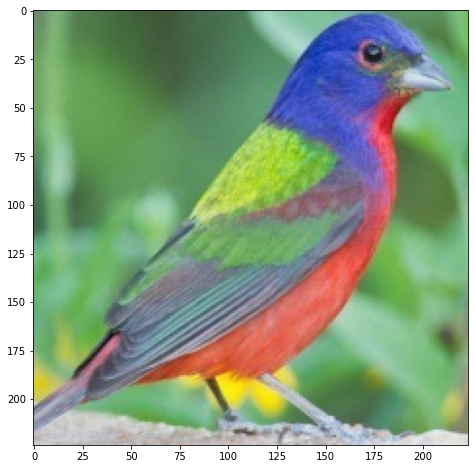

In [490]:
#display an image of the painted punting
import imageio
%matplotlib inline

pic = imageio.imread('dataNY/train/PAINTED BUNTING/006.jpg')
plt.figure(figsize = (8,8))

plt.imshow(pic)

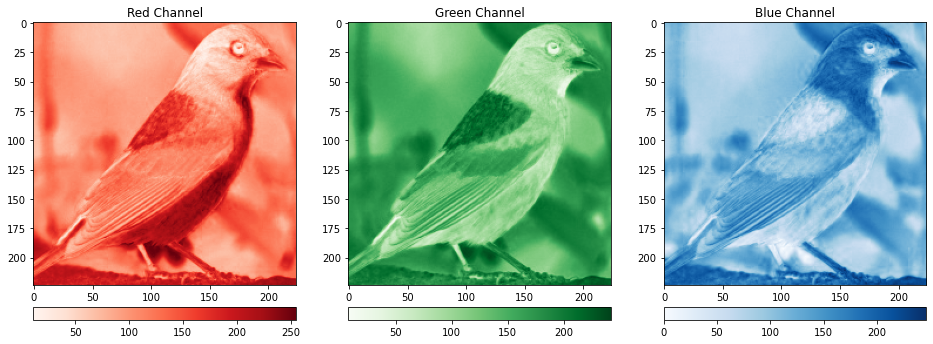

In [538]:
#display a 3 color image of this bird
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(16, 12))
#add the subplot
ax1 = fig.add_subplot(131)
#plot the 1 channel
im1 = ax1.imshow(pic[:,:,0],cmap='Reds')
ax1.set_title('Red Channel')

#make the colorbar
divider = make_axes_locatable(ax1)
cax = divider.append_axes('bottom', size='5%', pad=0.3)
fig.colorbar(im1, cax=cax, orientation='horizontal')

ax2 = fig.add_subplot(132)
im2 = ax2.imshow(pic[:,:,1],cmap='Greens')
ax2.set_title('Green Channel')

divider = make_axes_locatable(ax2)
cax = divider.append_axes('bottom', size='5%', pad=0.3)
fig.colorbar(im2, cax=cax, orientation='horizontal')

ax3 = fig.add_subplot(133)
im3 = ax3.imshow(pic[:,:,2],cmap='Blues')
ax3.set_title('Blue Channel')

divider = make_axes_locatable(ax3)
cax = divider.append_axes('bottom', size='5%', pad=0.3)
fig.colorbar(im3, cax=cax, orientation='horizontal')

plt.show()

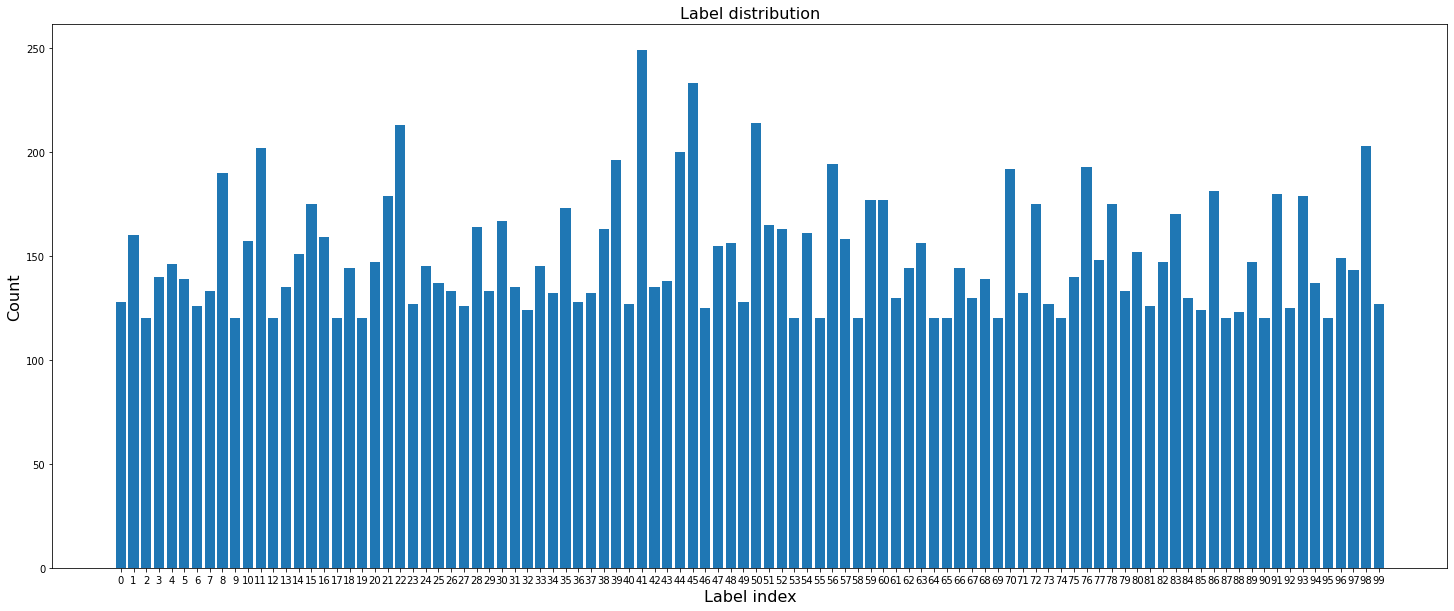

In [542]:
#plot the label distribution
train =  "dataNY/train/"
train_dic = {}
for name in os.listdir(train):
    if os.path.isdir(os.path.join(train, name)):
        train_dic[name] = len([i for i in os.listdir(os.path.join(train, name))])
# print(train)


plt.figure(figsize=(25, 10))
plt.bar(range(len(train_dic)), list(train_dic.values()), align='center')
plt.xticks(range(len(train_dic)))
plt.xlabel('Label index',size=16)
plt.ylabel('Count',size=16)
plt.title('Label distribution',size=16)
plt.show()